In [1]:
import os
import sys

sys.path.append(os.path.dirname(os.getcwd()))
from src.config.setup import SetupConfig
from src.data_workflow.create_tables.create_tables import retrieve_all_table_data


import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import folium

**Para acceder a los datos lo podemos hacer usando la función:**

`retrieve_all_table_data(<table_name>)`

Parámetros:
- table_name: nombre de la tabla

Para acceder al nombre de la tabla, hacerlo a tráves de la clase SetupConfig:
- `SetupConfig.TABLE_ACCIDENTE`
- `SetupConfig.TABLE_ACTOR_VIAL`
- `SetupConfig.TABLE_CAUSA`
- `SetupConfig.TABLE_LESIONADO`
- `SetupConfig.TABLE_MUERTO`
- `SetupConfig.TABLE_VEHICULO`
- `SetupConfig.TABLE_VIA`

#### ACCIDENTE

In [ ]:
ACCIDENTE = retrieve_all_table_data(SetupConfig.TABLE_ACCIDENTE)

print(f'El dataset tiene {ACCIDENTE.shape[0]} filas y {ACCIDENTE.shape[1]} columnas ')

In [3]:
tabla = ACCIDENTE.groupby(['GRAVEDAD'])['FORMULARIO'].count().reset_index()
tabla

,GRAVEDAD,FORMULARIO
0,CON HERIDOS,170316
1,CON MUERTOS,7887
2,SOLO DANOS,295677


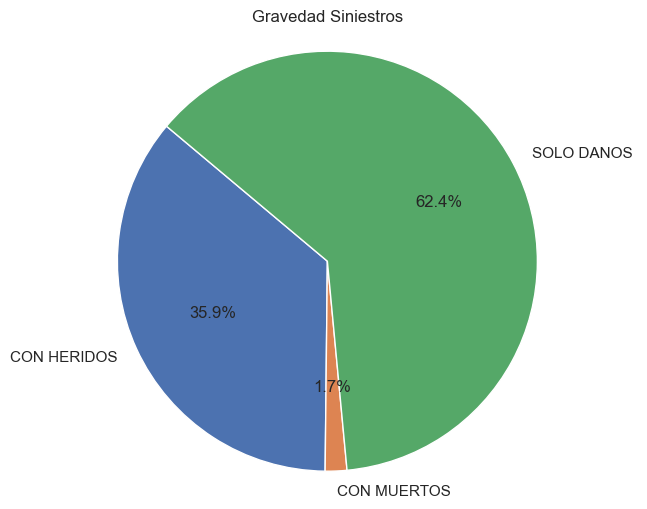

In [29]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
sns.set_palette("dark")
sns.set(style="whitegrid")
plt.pie(tabla["FORMULARIO"], labels=tabla["GRAVEDAD"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Título del gráfico
plt.title('Gravedad Siniestros')

# Mostrar el gráfico
plt.show()

In [31]:
tabla = ACCIDENTE.groupby(['CLASE_ACC'])['FORMULARIO'].count().reset_index()
tabla

,CLASE_ACC,FORMULARIO
0,ATROPELLO,54170
1,AUTOLESION,2223
2,CAIDA DE OCUPANTE,10605
3,CHOQUE,394968
4,INCENDIO,46
5,OTRO,5464
6,VOLCAMIENTO,6267


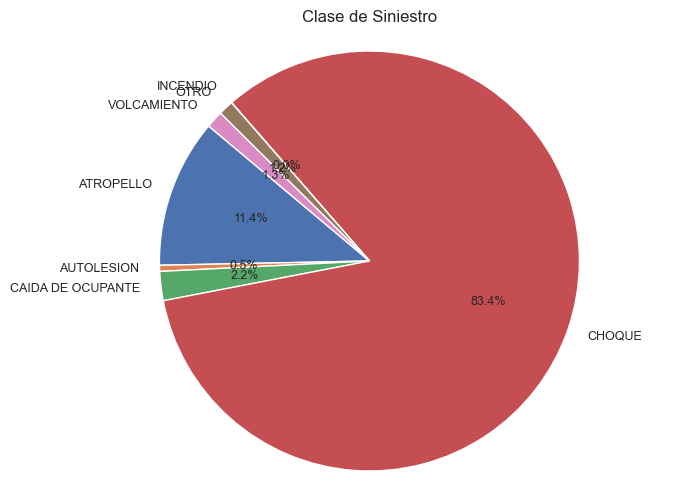

In [40]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
sns.set_palette("Set2")
sns.set(style="whitegrid")
plt.pie(tabla["FORMULARIO"], labels=tabla["CLASE_ACC"], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 9})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Título del gráfico
plt.title('Clase de Siniestro')

# Mostrar el gráfico
plt.show()

In [9]:
tabla = ACCIDENTE.groupby(['LATITUD', 'LONGITUD'])['FORMULARIO'].count().reset_index()
tabla = tabla.sort_values(by="FORMULARIO", ascending=False)
tabla

,LATITUD,LONGITUD,FORMULARIO
191309,4.695608,-74.087418,406
178386,4.685544,-74.048252,384
112002,4.631436,-74.136883,376
130190,4.644705,-74.131508,372
53128,4.597000,-74.179500,288
...,...,...,...
87762,4.618244,-74.106061,1
87763,4.618245,-74.139473,1
87766,4.618247,-74.146885,1
87767,4.618248,-74.108392,1


In [ ]:
import folium
from folium.plugins import HeatMap
import pandas as pd

m = folium.Map(location=[tabla['LATITUD'].mean(), tabla['LONGITUD'].mean()], zoom_start=11)
# Convertir las coordenadas a una lista de listas
data = tabla[['LATITUD', 'LONGITUD', 'FORMULARIO']].values.tolist()

gradient = {0.2: 'blue',  0.6: 'yellow',  1: 'red'}
# Crear el mapa de calor
HeatMap(data, radius=10, max_zoom=13, gradient=gradient).add_to(m)

# Guardar el mapa
m.save('mapa_accidentes_heatmap.html')

Text(0, 0.5, 'Cantidad Siniestros')

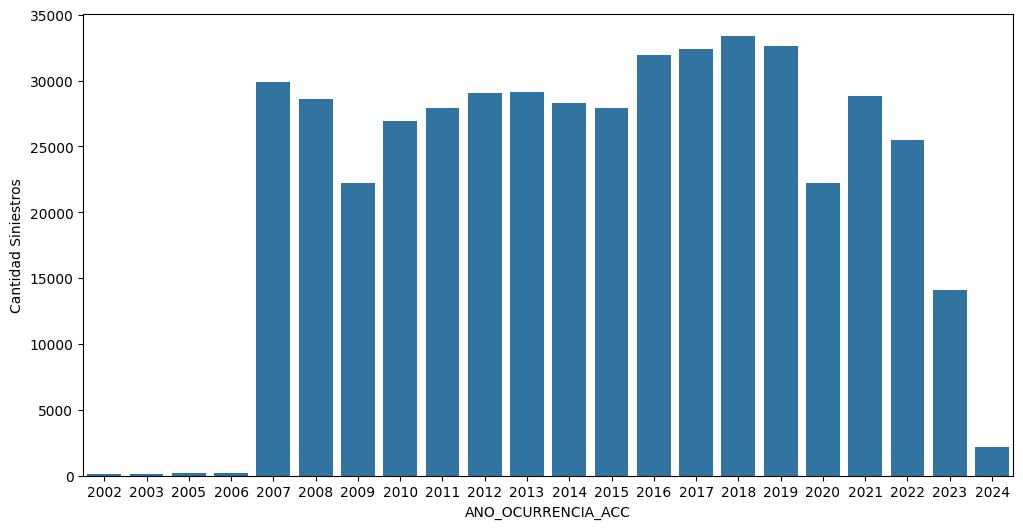

In [64]:
## NUMERO DE ACCIDENTES AÑO
tabla = ACCIDENTE.groupby(['ANO_OCURRENCIA_ACC'])['FORMULARIO'].count().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(tabla, x="ANO_OCURRENCIA_ACC", y="FORMULARIO")
plt.ylabel("Cantidad Siniestros")

In [71]:
tabla = ACCIDENTE.groupby(['MES_OCURRENCIA_ACC'])['FORMULARIO'].count().reset_index()
orden_meses = pd.DataFrame({"MES":["ENERO", "FEBRERO", "MARZO", "ABRIL", "MAYO", "JUNIO", "JULIO", "AGOSTO","SEPTIEMBRE", "OCTUBRE", "NOVIEMBRE", "DICIEMBRE"],
                            "MES_NUM": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})
orden_meses
# Ordenar el DataFrame por el valor numérico de los meses
tabla = pd.merge(tabla, orden_meses, left_on="MES_OCURRENCIA_ACC", right_on="MES", how = "left")
tabla = tabla.sort_values(by='MES_NUM').reset_index(drop=True)
tabla



,MES_OCURRENCIA_ACC,FORMULARIO,MES,MES_NUM
0,ENERO,34399,ENERO,1
1,FEBRERO,40149,FEBRERO,2
2,MARZO,41627,MARZO,3
3,ABRIL,37270,ABRIL,4
4,MAYO,40899,MAYO,5
5,JUNIO,38396,JUNIO,6
6,JULIO,39001,JULIO,7
7,AGOSTO,40306,AGOSTO,8
8,SEPTIEMBRE,40720,SEPTIEMBRE,9
9,OCTUBRE,41173,OCTUBRE,10


Text(0, 0.5, 'Cantidad Siniestros')

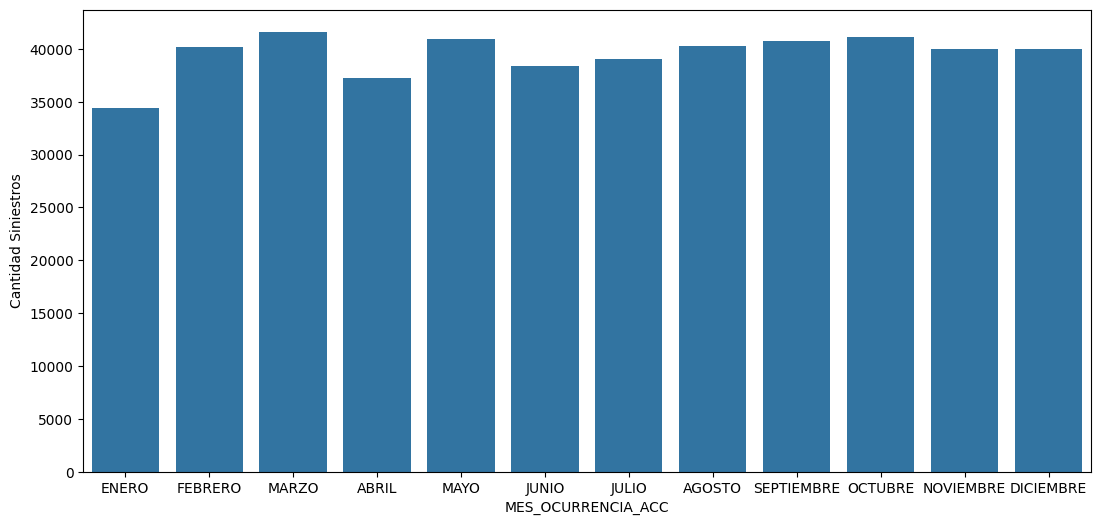

In [75]:
# Gráfico
plt.figure(figsize=(13, 6))
sns.barplot(tabla, x="MES_OCURRENCIA_ACC", y="FORMULARIO")
plt.ylabel("Cantidad Siniestros")

In [78]:
tabla = ACCIDENTE.groupby(['DIA_OCURRENCIA_ACC'])['FORMULARIO'].count().reset_index()
orden_dias = pd.DataFrame({"DIA":["LUNES", "MARTES", "MIERCOLES", "JUEVES", "VIERNES", "SABADO", "DOMINGO"],
                            "DIA_NUM": [1, 2, 3, 4, 5, 6, 7]})
orden_meses
# Ordenar el DataFrame por el valor numérico de los meses
tabla = pd.merge(tabla, orden_dias, left_on="DIA_OCURRENCIA_ACC", right_on="DIA", how = "left")
tabla = tabla.sort_values(by='DIA_NUM').reset_index(drop=True)
tabla

,DIA_OCURRENCIA_ACC,FORMULARIO,DIA,DIA_NUM
0,LUNES,63990,LUNES,1
1,MARTES,72092,MARTES,2
2,MIERCOLES,70527,MIERCOLES,3
3,JUEVES,69198,JUEVES,4
4,VIERNES,76241,VIERNES,5
5,SABADO,73685,SABADO,6
6,DOMINGO,48150,DOMINGO,7


Text(0, 0.5, 'Cantidad Siniestros')

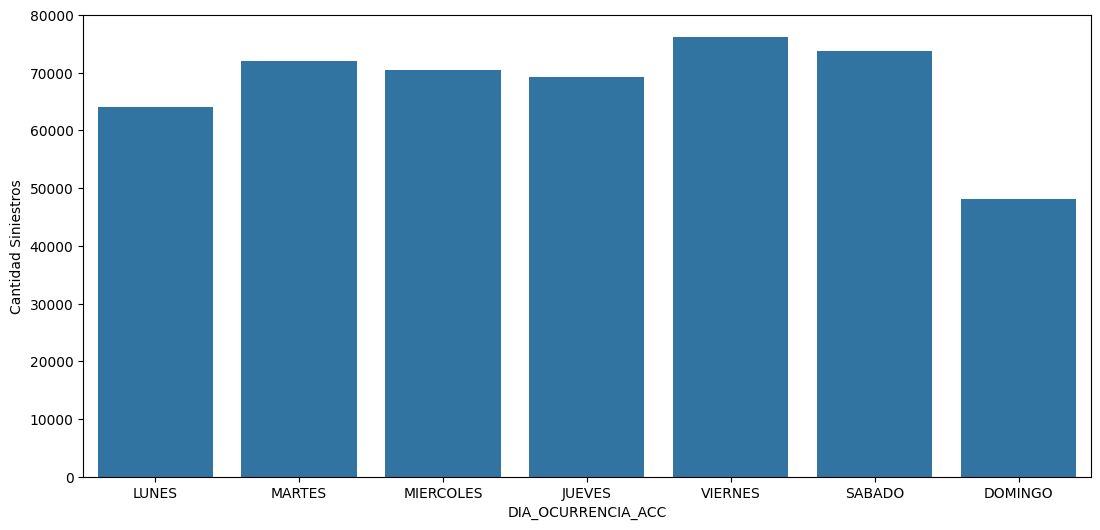

In [79]:
# Gráfico
plt.figure(figsize=(13, 6))
sns.barplot(tabla, x="DIA_OCURRENCIA_ACC", y="FORMULARIO")
plt.ylabel("Cantidad Siniestros")

In [96]:
tabla = ACCIDENTE.groupby(['HORA_OCURRENCIA_ACC'])['FORMULARIO'].count().reset_index()
tabla['HORA_OCURRENCIA_ACC'] = pd.to_datetime(tabla['HORA_OCURRENCIA_ACC'])
tabla_grouped = tabla.groupby(tabla['HORA_OCURRENCIA_ACC'].dt.strftime('%H:00:00'))['FORMULARIO'].sum().reset_index()
tabla_grouped

C:\Users\monic\AppData\Local\Temp\ipykernel_14056\159801862.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  tabla['HORA_OCURRENCIA_ACC'] = pd.to_datetime(tabla['HORA_OCURRENCIA_ACC'])


,HORA_OCURRENCIA_ACC,FORMULARIO
0,00:00:00,5941
1,01:00:00,4767
2,02:00:00,4178
3,03:00:00,4841
4,04:00:00,5444
5,05:00:00,12824
6,06:00:00,22646
7,07:00:00,28548
8,08:00:00,26520
9,09:00:00,23818


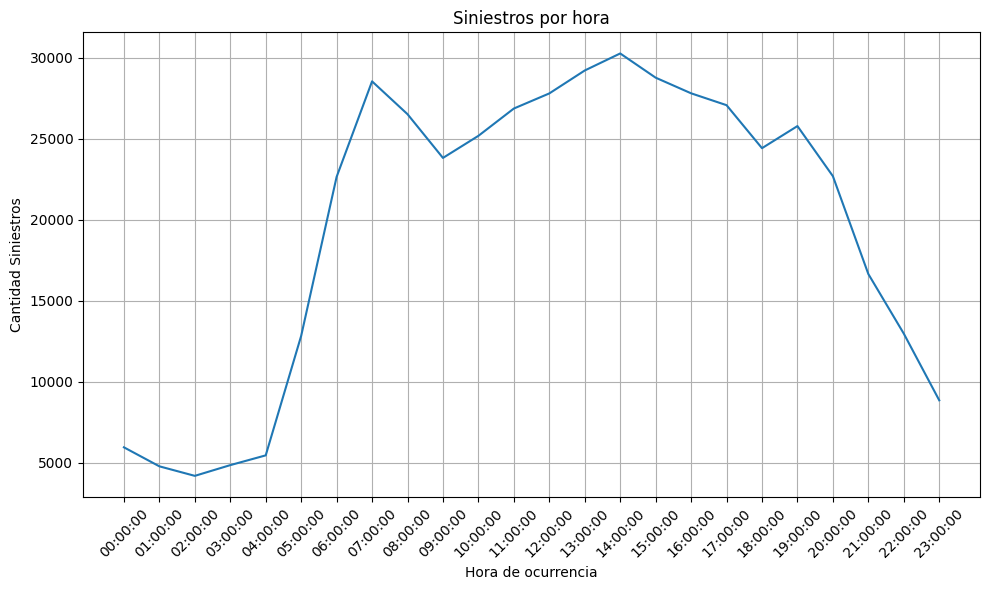

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(tabla_grouped['HORA_OCURRENCIA_ACC'], tabla_grouped['FORMULARIO'])
plt.title('Siniestros por hora')
plt.xlabel('Hora de ocurrencia')
plt.ylabel('Cantidad Siniestros')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Actor Vial

In [8]:
ActorVial = retrieve_all_table_data(SetupConfig.TABLE_ACTOR_VIAL)

print(f'El dataset tiene {ActorVial.shape[0]} filas y {ActorVial.shape[1]} columnas ')

El dataset tiene 1679376 filas y 14 columnas 


In [9]:
ActorVial.head(5)

,OBJECTID,FORMULARIO,CODIGO_ACCIDENTADO,CODIGO_VICTIMA,CODIGO_VEHICULO,CONDICION,ESTADO,MUERTE_POSTERIOR,FECHA_POSTERIOR_MUERTE,GENERO,FECHA_NACIMIENTO,EDAD,CODIGO,CONDICION_VEHICULO
0,1,A001395442,12806435,4,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2006-12-29 14:00:00,15.0,10566396-2,PASAJERO
1,2,A001395442,12806433,3,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,MASCULINO,2005-12-09 14:00:00,16.0,10566396-2,PASAJERO
2,3,A001395442,12806431,2,2.0,PASAJERO,HERIDO,N,1975-01-01 01:00:00,FEMENINO,1967-09-29 14:00:00,54.0,10566396-2,PASAJERO
3,4,A001395442,12806430,1,2.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1987-03-15 02:00:00,35.0,10566396-2,CONDUCTOR
4,5,A001395863,12806432,0,1.0,CONDUCTOR,HERIDO,N,1975-01-01 01:00:00,MASCULINO,1971-04-20 02:00:00,50.0,10566397-1,CONDUCTOR


In [11]:
#ActorVial[ActorVial["Formulario"] == "A000239725"]
tabla = ActorVial.groupby(['FORMULARIO']).agg("size").reset_index(name = "conteo")
tabla = tabla.sort_values(by = "conteo", ascending=False)

# Definir los intervalos
bins = [0, 20, 40, 60, 80]

# Crear los intervalos y contar la frecuencia
conteo_intervalos = pd.cut(tabla['conteo'], bins=bins).value_counts().sort_index()
conteo_intervalos

conteo
(0, 20]     781323
(20, 40]       129
(40, 60]        14
(60, 80]         3
Name: count, dtype: int64

In [12]:
tabla.describe()

,conteo
count,781469.000000
mean,2.148999
std,0.816954
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,75.000000


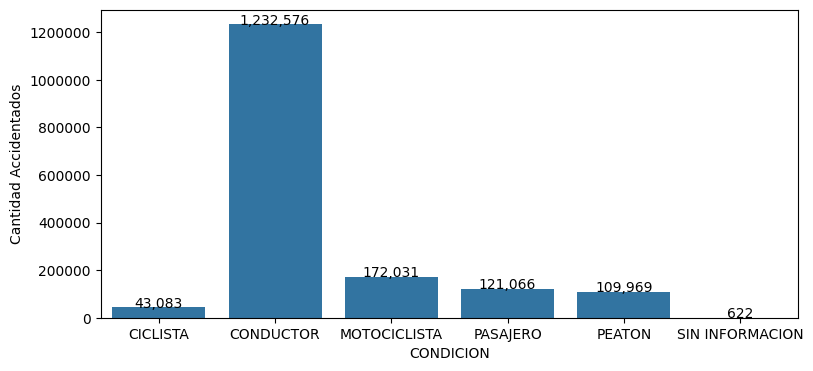

In [15]:
tabla = ActorVial.groupby(['CONDICION']).agg("size").reset_index(name = "conteo")
# Gráfico
plt.figure(figsize=(9, 4))
sns.barplot(tabla, x='CONDICION', y="conteo")
plt.ylabel("Cantidad Accidentados")
plt.ticklabel_format(style='plain', axis='y')

for index, row in tabla.iterrows():
    plt.text(index, row.conteo, f"{row.conteo:,}", color='black', ha="center")
    
plt.show()

   ESTADO   conteo
0  HERIDO   403229
1   ILESO  1258254
2  MUERTO    12236


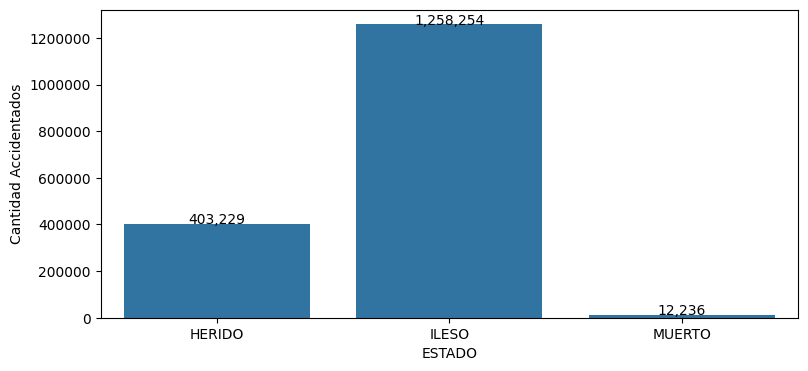

In [16]:
tabla = ActorVial.groupby(['Estado'.upper()]).agg("size").reset_index(name = "conteo")
print(tabla)
# Gráfico
plt.figure(figsize=(9, 4))
sns.barplot(tabla, x="Estado".upper(), y="conteo")
plt.ylabel("Cantidad Accidentados")
plt.ticklabel_format(style='plain', axis='y')

for index, row in tabla.iterrows():
    plt.text(index, row.conteo, f"{row.conteo:,}", color='black', ha="center")
    
plt.show()

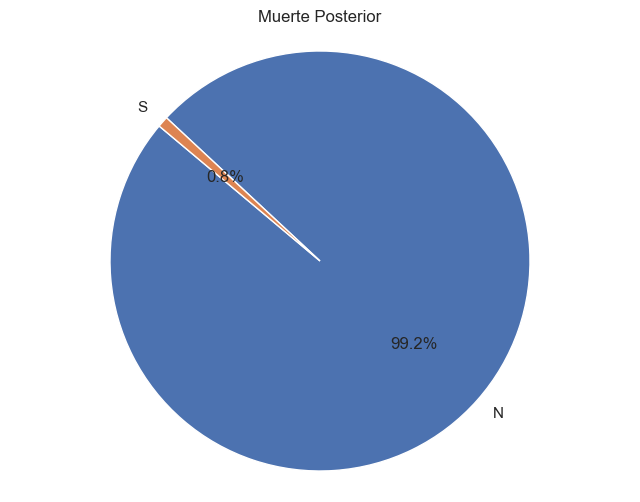

In [17]:
tabla = ActorVial.groupby(['MUERTE_POSTERIOR']).agg("size").reset_index(name = "conteo")
# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
sns.set_palette("dark")
sns.set(style="whitegrid")
plt.pie(tabla["conteo"], labels=tabla["MUERTE_POSTERIOR"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Título del gráfico
plt.title('Muerte Posterior')

# Mostrar el gráfico
plt.show()

            GENERO   conteo
0         FEMENINO   262978
1        MASCULINO  1360173
2  SIN INFORMACION    51832


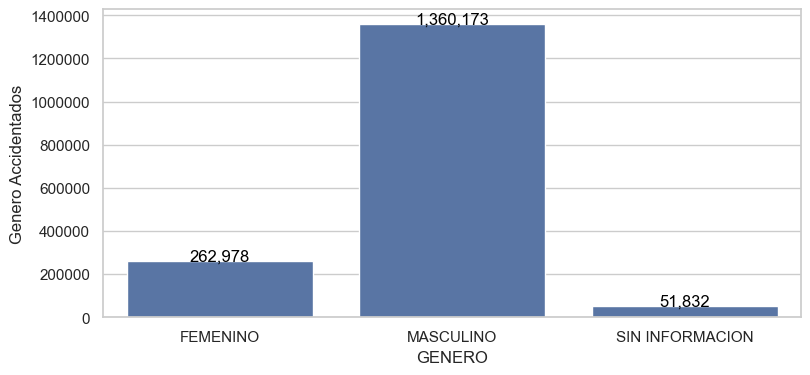

In [19]:
tabla = ActorVial.groupby(['GENERO']).agg("size").reset_index(name = "conteo")
print(tabla)
# Gráfico
plt.figure(figsize=(9, 4))
sns.barplot(tabla, x="GENERO", y="conteo")
plt.ylabel("Genero Accidentados")
plt.ticklabel_format(style='plain', axis='y')

for index, row in tabla.iterrows():
    plt.text(index, row.conteo, f"{row.conteo:,}", color='black', ha="center")
    
plt.show()

In [21]:
ActorVial["EDAD"].describe().round(0)

count    1517332.0
mean          37.0
std           40.0
min        -7624.0
25%           27.0
50%           35.0
75%           46.0
max         2021.0
Name: EDAD, dtype: float64